In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq 'drive/My Drive/chest cancer/Data.zip'

In [ ]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import glob
import warnings
from keras.layers import Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D
from keras.models import Sequential

from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [ ]:
import skimage
from skimage.transform import resize
def read_images(path,name):
  images=[]
  labels=[]
  for img in glob.glob(path+'/'+name+'/*.png'):
    image=cv2.imread(img)
    img = skimage.transform.resize(image, (48, 48, 3))
    images.append(img)
    labels.append(name)
  return images,labels

In [ ]:
images_cancer,labels=read_images('Data/train','carcinoma')
X=np.array(images_cancer)
X.shape

(115, 48, 48, 3)

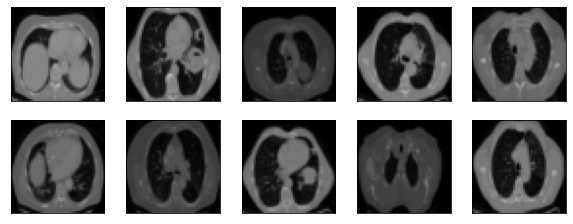

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(images_cancer[i])

In [ ]:
labels=['carcinoma','adenocarcinoma','normal','squamous']
all_images=[]
all_labels=[]
for label in labels:
  images,labels=read_images('Data/train',label)
  all_images+=images
  all_labels+=labels

In [ ]:
X_train=np.array(all_images)
y_train=np.array(all_labels)

In [ ]:
labels=['carcinoma','adenocarcinoma','normal','squamous']
all_images_v=[]
all_labels_v=[]
for label in labels:
  images_v,labels_v=read_images('Data/valid',label)
  all_images_v+=images_v
  all_labels_v+=labels_v

In [ ]:
X_valid=np.array(all_images_v)
y_valid=np.array(all_labels_v)

In [ ]:
X_train.shape


(601, 48, 48, 3)

In [ ]:
dict={0:'normal',1:'carcinoma',2:'adenocarcinoma',3:'squamous'}

In [ ]:
for i, element in enumerate(y_train):
  if element =='normal':
    y_train[i]=0
  elif element=='carcinoma':
    y_train[i]=1
  elif element=='adenocarcinoma':
    y_train[i]=2
  else:
    y_train[i]=3
      


In [ ]:
for i, element in enumerate(y_valid):
  if element =='normal':
    y_valid[i]=0
  elif element=='carcinoma':
    y_valid[i]=1
  elif element=='adenocarcinoma':
    y_valid[i]=2
  else:
    y_valid[i]=3
      

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train)

In [ ]:
y_valid=tf.keras.utils.to_categorical(y_valid)

In [ ]:
from tensorflow import keras 
from keras.layers import Conv2D,Dense, Flatten, MaxPooling2D,Dropout,Activation
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(256,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(rate=0.3))



model.add(Flatten())
model.add(Dense(units=1024,kernel_regularizer=l2(0.001),activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=10,epochs=50)

Epoch 1/50
61/61 [==============================] - 33s 503ms/step - loss: 2.8876 - accuracy: 0.4925 - val_loss: 2.3508 - val_accuracy: 0.3750
Epoch 2/50
61/61 [==============================] - 30s 499ms/step - loss: 2.6214 - accuracy: 0.5308 - val_loss: 2.6172 - val_accuracy: 0.3333
Epoch 3/50
61/61 [==============================] - 31s 505ms/step - loss: 2.3404 - accuracy: 0.5624 - val_loss: 2.7899 - val_accuracy: 0.4444
Epoch 4/50
61/61 [==============================] - 31s 503ms/step - loss: 2.0536 - accuracy: 0.5907 - val_loss: 2.7010 - val_accuracy: 0.4167
Epoch 5/50
61/61 [==============================] - 31s 504ms/step - loss: 1.7810 - accuracy: 0.6373 - val_loss: 2.7056 - val_accuracy: 0.4167
Epoch 6/50
61/61 [==============================] - 31s 504ms/step - loss: 1.6524 - accuracy: 0.6789 - val_loss: 1.8843 - val_accuracy: 0.5833
Epoch 7/50
61/61 [==============================] - 31s 507ms/step - loss: 1.6075 - accuracy: 0.6772 - val_loss: 2.7677 - val_accuracy: 0.4167

In [ ]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=20,epochs=5)

Epoch 1/5
31/31 [==============================] - 30s 965ms/step - loss: 1.2242 - accuracy: 0.8120 - val_loss: 1.7297 - val_accuracy: 0.6944
Epoch 2/5
31/31 [==============================] - 30s 968ms/step - loss: 1.1890 - accuracy: 0.7953 - val_loss: 2.1865 - val_accuracy: 0.5278
Epoch 3/5
31/31 [==============================] - 30s 969ms/step - loss: 1.1583 - accuracy: 0.8070 - val_loss: 1.7817 - val_accuracy: 0.6250
Epoch 4/5
31/31 [==============================] - 30s 972ms/step - loss: 1.1322 - accuracy: 0.8103 - val_loss: 3.2439 - val_accuracy: 0.4167
Epoch 5/5
31/31 [==============================] - 30s 977ms/step - loss: 1.1383 - accuracy: 0.8186 - val_loss: 2.5046 - val_accuracy: 0.5417


In [ ]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=20,epochs=3)

Epoch 1/3
31/31 [==============================] - 30s 973ms/step - loss: 1.2984 - accuracy: 0.7404 - val_loss: 6.2119 - val_accuracy: 0.4861
Epoch 2/3
31/31 [==============================] - 30s 968ms/step - loss: 1.1705 - accuracy: 0.7870 - val_loss: 1.6562 - val_accuracy: 0.6667
Epoch 3/3
31/31 [==============================] - 30s 970ms/step - loss: 1.2181 - accuracy: 0.7770 - val_loss: 5.8989 - val_accuracy: 0.2500


In [ ]:
early_stopping=keras.callbacks.EarlyStopping(patience=3,min_delta=0.001,restore_best_weights=True)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=20,epochs=16)

Epoch 1/20
31/31 [==============================] - 30s 957ms/step - loss: 0.9575 - accuracy: 0.8236 - val_loss: 1.6119 - val_accuracy: 0.7361
Epoch 2/20
31/31 [==============================] - 30s 959ms/step - loss: 1.0661 - accuracy: 0.7770 - val_loss: 2.1889 - val_accuracy: 0.5000
Epoch 3/20
31/31 [==============================] - 30s 959ms/step - loss: 1.1537 - accuracy: 0.7354 - val_loss: 5.0471 - val_accuracy: 0.2361
Epoch 4/20
31/31 [==============================] - 30s 961ms/step - loss: 1.1224 - accuracy: 0.7504 - val_loss: 2.6844 - val_accuracy: 0.3333


***model1+ Data Augmentation ***
**texte en gras**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')


In [ ]:
it = datagen.flow(X_train,y_train)
model.fit_generator(it,steps_per_epoch=200,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
200/200 [==============================] - 29s 137ms/step - loss: 1.5952 - accuracy: 0.5574


In [ ]:
from skimage import io
import matplotlib.pyplot as plt

In [ ]:
img_path = 'drive/My Drive/chest cancer/az.jpg'
image = io.imread(img_path)

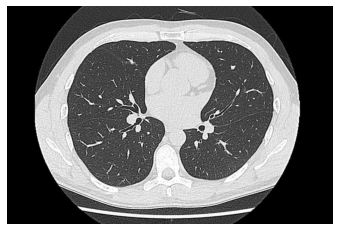

In [ ]:
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(image)

In [ ]:
predicted_image = np.asarray(image)


In [ ]:
img = cv2.resize(predicted_image,(48,48),3)

In [ ]:
tab=[]
tab.append(img)
np.array(tab).shape

(1, 48, 48, 3)

In [ ]:
tab = []
tab.append(img)
tab = np.array(tab)
print(dict[np.argmax(model.predict(tab))])

normal


In [ ]:
img_path = 'drive/My Drive/chest cancer/eez.jpg'
image = io.imread(img_path)

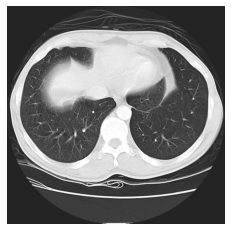

In [ ]:
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(image)

In [ ]:
predicted_image = np.asarray(image)
img = cv2.resize(predicted_image,(48,48),3)
tab=[]
tab.append(img)
np.array(tab).shape

(1, 48, 48, 3)

In [ ]:
tab = []
tab.append(img)
tab = np.array(tab)
print(dict[np.argmax(model.predict(tab))])

normal
